In [1]:
# %pip install pandas
# %pip install scikit-learn
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib

In [2]:
import pandas as pd

In [3]:
input_df = pd.read_csv("../Data/Input.csv")
input_df.columns = ['Timestamp', 'Resource', 'User', 'Action']
input_df['Timestamp'] = pd.to_datetime(input_df['Timestamp']).astype('datetime64[ns]').astype(int)/1e9
input_df

,Timestamp,Resource,User,Action
0,1.679416e+09,bucket/search,Lora Durbann,CREATE
1,1.679416e+09,bucket/movieDetails,Rand Bram,READ
2,1.679416e+09,bucket/search,Perceval Dallosso,CREATE
3,1.679416e+09,bucket/movieDetails,Aleda Pigram,DELETE
4,1.679416e+09,bucket/search,Burlie Schustl,WRITE
...,...,...,...,...
2241,1.676865e+09,bucket/search,Gerrard Furmonger,READ
2242,1.676865e+09,bucket/browseTitles,Carine Winscom,WRITE
2243,1.676865e+09,bucket/search,Corinne Whickman,WRITE
2244,1.676865e+09,bucket/profilesGate,Pedro Benediktovich,READ


In [4]:

from sklearn.preprocessing import LabelEncoder
import numpy as np

le_resource = LabelEncoder()
input_df['Resource'] = le_resource.fit_transform(input_df['Resource'])

le_user = LabelEncoder()
input_df['User'] = le_user.fit_transform(input_df['User'])

le_action = LabelEncoder()
input_df['Action'] = le_action.fit_transform(input_df['Action'])

input_df

,Timestamp,Resource,User,Action
0,1.679416e+09,18,1385,0
1,1.679416e+09,11,1776,2
2,1.679416e+09,18,1732,0
3,1.679416e+09,11,62,1
4,1.679416e+09,18,359,4
...,...,...,...,...
2241,1.676865e+09,18,907,2
2242,1.676865e+09,3,378,4
2243,1.676865e+09,18,519,4
2244,1.676865e+09,16,1724,2


In [5]:
input_df = input_df.reset_index().rename(columns={'index':'row_number'})
input_df

,row_number,Timestamp,Resource,User,Action
0,0,1.679416e+09,18,1385,0
1,1,1.679416e+09,11,1776,2
2,2,1.679416e+09,18,1732,0
3,3,1.679416e+09,11,62,1
4,4,1.679416e+09,18,359,4
...,...,...,...,...,...
2241,2241,1.676865e+09,18,907,2
2242,2242,1.676865e+09,3,378,4
2243,2243,1.676865e+09,18,519,4
2244,2244,1.676865e+09,16,1724,2


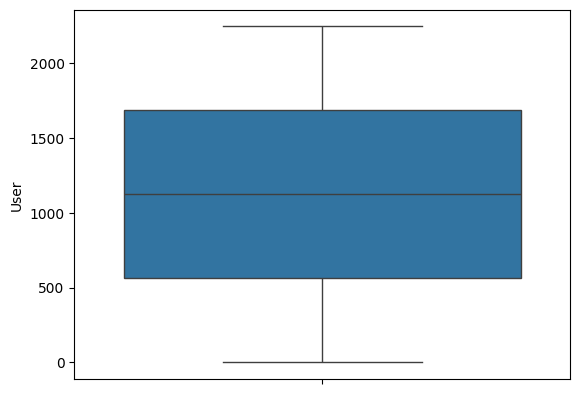

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.boxplot(input_df["User"])
plt.show()

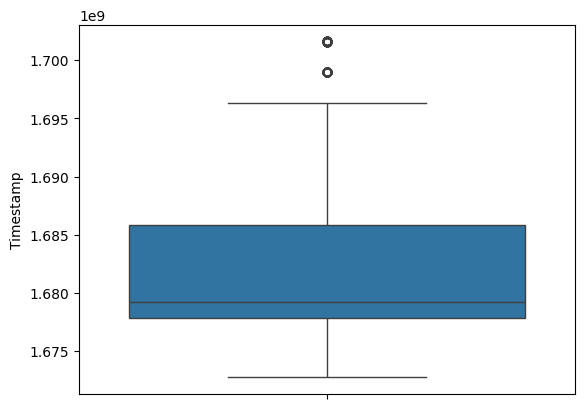

In [7]:
sns.boxplot(input_df["Timestamp"])
plt.show()

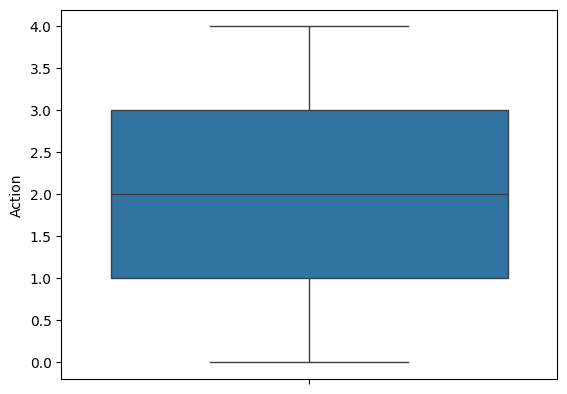

In [8]:
sns.boxplot(input_df["Action"])
plt.show()

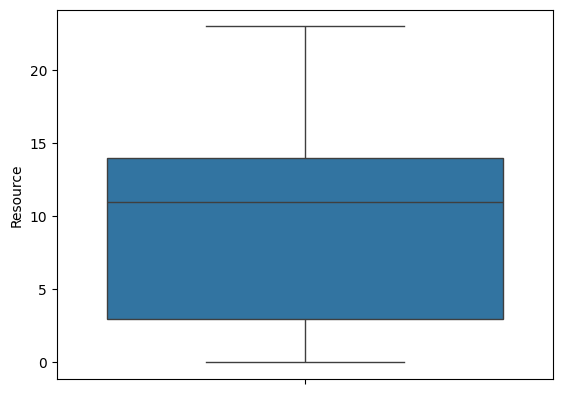

In [9]:
sns.boxplot(input_df["Resource"])
plt.show()

In [10]:
from sklearn.ensemble import IsolationForest
import numpy as np

X = input_df[['Timestamp', 'Resource', 'User', 'Action']]

#0.3% of the data is contaminated/anomalous
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.4),random_state=random_state)

model.fit(X)

preds = model.predict(X)
input_df['is_anomaly'] = preds
input_df['decision_scores'] = model.decision_function(X)


In [11]:
input_df

,row_number,Timestamp,Resource,User,Action,is_anomaly,decision_scores
0,0,1.679416e+09,18,1385,0,-1,-0.005314
1,1,1.679416e+09,11,1776,2,1,0.071438
2,2,1.679416e+09,18,1732,0,-1,-0.018765
3,3,1.679416e+09,11,62,1,1,0.016253
4,4,1.679416e+09,18,359,4,-1,-0.026918
...,...,...,...,...,...,...,...
2241,2241,1.676865e+09,18,907,2,1,0.006702
2242,2242,1.676865e+09,3,378,4,-1,-0.012248
2243,2243,1.676865e+09,18,519,4,-1,-0.032306
2244,2244,1.676865e+09,16,1724,2,1,0.008107


In [12]:
input_df['Timestamp'] = pd.to_datetime(input_df['Timestamp'], unit='s')

start_date = pd.Timestamp('2023-01-01')
end_date = pd.Timestamp('2023-01-31')

training_df = input_df[(input_df['Timestamp'] >= start_date) & (input_df['Timestamp'] <= end_date)]
testing_df = input_df[(input_df['Timestamp'] < start_date) | (input_df['Timestamp'] > end_date)]

training_df['Timestamp'] = pd.to_datetime(training_df['Timestamp']).astype('datetime64[ns]').astype(int)/1e9
testing_df['Timestamp'] = pd.to_datetime(testing_df['Timestamp']).astype('datetime64[ns]').astype(int)/1e9

/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/2753910707.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['Timestamp'] = pd.to_datetime(training_df['Timestamp']).astype('datetime64[ns]').astype(int)/1e9
/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/2753910707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['Timestamp'] = pd.to_datetime(testing_df['Timestamp']).astype('datetime64[ns]').astype(int)/1e9


In [13]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Split the data into features and target for the training set
X_train = training_df[['Timestamp', 'Resource', 'User', 'Action']]
y_train = training_df['is_anomaly']

# Split the data into features and target for the testing set
X_test = testing_df[['Timestamp', 'Resource', 'User', 'Action']]
y_test = testing_df['is_anomaly']

# Create an instance of the model
clf = IsolationForest(contamination=0.2)

# Train the model on the training data
clf.fit(X_train)

# Make predictions on the test data
preds = clf.predict(X_test)

# Add the predictions to the test data
testing_df['is_anomaly'] = preds
testing_df['decision_scores'] = clf.decision_function(X_test)


/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/2255237804.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['is_anomaly'] = preds
/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/2255237804.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['decision_scores'] = clf.decision_function(X_test)


In [14]:
testing_df

,row_number,Timestamp,Resource,User,Action,is_anomaly,decision_scores
0,0,1.679416e+09,18,1385,0,-1,-0.076805
1,1,1.679416e+09,11,1776,2,-1,-0.033541
2,2,1.679416e+09,18,1732,0,-1,-0.095664
3,3,1.679416e+09,11,62,1,-1,-0.024109
4,4,1.679416e+09,18,359,4,-1,-0.080094
...,...,...,...,...,...,...,...
2241,2241,1.676865e+09,18,907,2,-1,-0.031903
2242,2242,1.676865e+09,3,378,4,-1,-0.050462
2243,2243,1.676865e+09,18,519,4,-1,-0.079450
2244,2244,1.676865e+09,16,1724,2,-1,-0.041776


In [15]:
### First method of anomaly detection
testing_df['Resource'] = le_resource.inverse_transform(testing_df['Resource'])
testing_df['User'] = le_user.inverse_transform(testing_df['User'])
testing_df['Action'] = le_action.inverse_transform(testing_df['Action'])
testing_df['Timestamp'] = pd.to_datetime(testing_df['Timestamp'], unit='s')
testing_df

/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/1034585671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['Resource'] = le_resource.inverse_transform(testing_df['Resource'])
/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/1034585671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['User'] = le_user.inverse_transform(testing_df['User'])
/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/1034585671.py:4: SettingWithCopyWarning: 
A v

,row_number,Timestamp,Resource,User,Action,is_anomaly,decision_scores
0,0,2023-03-21 16:30:00,bucket/search,Lora Durbann,CREATE,-1,-0.076805
1,1,2023-03-21 16:30:00,bucket/movieDetails,Rand Bram,READ,-1,-0.033541
2,2,2023-03-21 16:30:00,bucket/search,Perceval Dallosso,CREATE,-1,-0.095664
3,3,2023-03-21 16:30:00,bucket/movieDetails,Aleda Pigram,DELETE,-1,-0.024109
4,4,2023-03-21 16:30:00,bucket/search,Burlie Schustl,WRITE,-1,-0.080094
...,...,...,...,...,...,...,...
2241,2241,2023-02-20 03:45:00,bucket/search,Gerrard Furmonger,READ,-1,-0.031903
2242,2242,2023-02-20 03:45:00,bucket/browseTitles,Carine Winscom,WRITE,-1,-0.050462
2243,2243,2023-02-20 03:45:00,bucket/search,Corinne Whickman,WRITE,-1,-0.079450
2244,2244,2023-02-20 03:44:00,bucket/profilesGate,Pedro Benediktovich,READ,-1,-0.041776


In [16]:
testing_df["is_anomaly"][testing_df["is_anomaly"] == -1] = 0 
# filtered_df = input_df[input_df['is_anomaly'] != 1]

/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/2086264215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df["is_anomaly"][testing_df["is_anomaly"] == -1] = 0
/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/2086264215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df["is_anomaly"][testing_df["is_anomaly"] == -1] = 0


In [17]:
testing_df['is_anomaly'] = testing_df['is_anomaly'].astype(bool)
testing_df['is_anomaly'] = ~testing_df['is_anomaly']

/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/1062305537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['is_anomaly'] = testing_df['is_anomaly'].astype(bool)
/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/1062305537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['is_anomaly'] = ~testing_df['is_anomaly']


In [18]:
filtered_df = testing_df[testing_df["decision_scores"] < 0]
filtered_df

,row_number,Timestamp,Resource,User,Action,is_anomaly,decision_scores
0,0,2023-03-21 16:30:00,bucket/search,Lora Durbann,CREATE,True,-0.076805
1,1,2023-03-21 16:30:00,bucket/movieDetails,Rand Bram,READ,True,-0.033541
2,2,2023-03-21 16:30:00,bucket/search,Perceval Dallosso,CREATE,True,-0.095664
3,3,2023-03-21 16:30:00,bucket/movieDetails,Aleda Pigram,DELETE,True,-0.024109
4,4,2023-03-21 16:30:00,bucket/search,Burlie Schustl,WRITE,True,-0.080094
...,...,...,...,...,...,...,...
2241,2241,2023-02-20 03:45:00,bucket/search,Gerrard Furmonger,READ,True,-0.031903
2242,2242,2023-02-20 03:45:00,bucket/browseTitles,Carine Winscom,WRITE,True,-0.050462
2243,2243,2023-02-20 03:45:00,bucket/search,Corinne Whickman,WRITE,True,-0.079450
2244,2244,2023-02-20 03:44:00,bucket/profilesGate,Pedro Benediktovich,READ,True,-0.041776


In [19]:
le_resource = LabelEncoder()
testing_df['Resource'] = le_resource.fit_transform(testing_df['Resource'])

le_user = LabelEncoder()
testing_df['User'] = le_user.fit_transform(testing_df['User'])

le_action = LabelEncoder()
testing_df['Action'] = le_action.fit_transform(testing_df['Action'])

testing_df['Timestamp'] = pd.to_datetime(testing_df['Timestamp']).astype('datetime64[ns]').astype(int)/1e9

testing_df

/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/3863473639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['Resource'] = le_resource.fit_transform(testing_df['Resource'])
/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/3863473639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['User'] = le_user.fit_transform(testing_df['User'])
/var/folders/fj/hf274vln1hv289v__2lt16540000gn/T/ipykernel_33303/3863473639.py:8: SettingWithCopyWarning: 
A value is 

,row_number,Timestamp,Resource,User,Action,is_anomaly,decision_scores
0,0,1.679416e+09,18,1350,0,True,-0.076805
1,1,1.679416e+09,11,1736,2,True,-0.033541
2,2,1.679416e+09,18,1692,0,True,-0.095664
3,3,1.679416e+09,11,62,1,True,-0.024109
4,4,1.679416e+09,18,352,4,True,-0.080094
...,...,...,...,...,...,...,...
2241,2241,1.676865e+09,18,884,2,True,-0.031903
2242,2242,1.676865e+09,3,371,4,True,-0.050462
2243,2243,1.676865e+09,18,509,4,True,-0.079450
2244,2244,1.676865e+09,16,1684,2,True,-0.041776


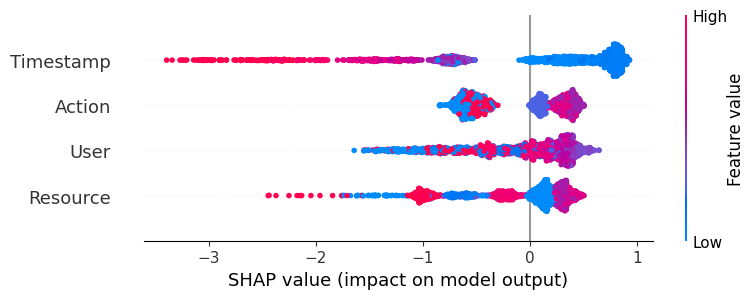

In [20]:
#%pip install shap
import shap

filtered_df = testing_df.loc[testing_df['is_anomaly'] == True]
selected_columns = ['Timestamp', 'Resource', 'User', 'Action']
shap_input_df = filtered_df[selected_columns]


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(shap_input_df)
shap.summary_plot(shap_values, shap_input_df)


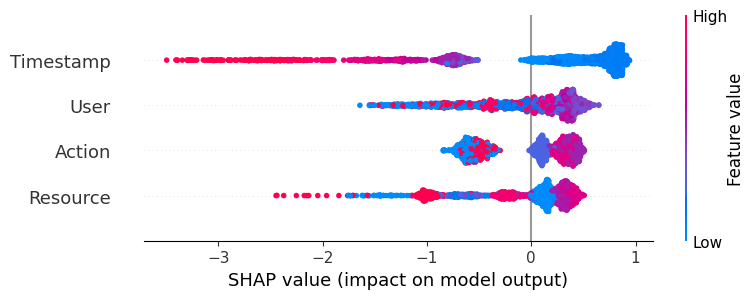

In [21]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(testing_df[selected_columns])
shap.summary_plot(shap_values, testing_df[selected_columns])

In [22]:
df_why_anomaly = pd.DataFrame(shap_values)
['Timestamp', 'Resource', 'User', 'Action']
df_why_anomaly = df_why_anomaly.rename(columns={0:'why_anomoly_timestamp'})
df_why_anomaly = df_why_anomaly.rename(columns={1:'why_anomoly_Resource'})
df_why_anomaly = df_why_anomaly.rename(columns={2:'why_anomoly_User'})
df_why_anomaly = df_why_anomaly.rename(columns={3:'why_anomoly_Action'})
df_why_anomaly

,why_anomoly_timestamp,why_anomoly_Resource,why_anomoly_User,why_anomoly_Action
0,0.696449,-1.006028,0.316501,-0.635536
1,0.797450,0.346165,-0.049826,0.405033
2,0.695474,-1.025688,0.053015,-0.638181
3,0.697135,0.342190,-1.146651,0.095678
4,0.627610,-0.983466,-0.229714,-0.655510
...,...,...,...,...
2196,-0.068980,-1.086492,0.459580,0.403298
2197,0.017315,0.069534,-0.270909,-0.660921
2198,0.010920,-0.954676,0.075523,-0.521417
2199,-0.059659,-0.360640,0.003020,0.298116


In [23]:
testing_df

,row_number,Timestamp,Resource,User,Action,is_anomaly,decision_scores
0,0,1.679416e+09,18,1350,0,True,-0.076805
1,1,1.679416e+09,11,1736,2,True,-0.033541
2,2,1.679416e+09,18,1692,0,True,-0.095664
3,3,1.679416e+09,11,62,1,True,-0.024109
4,4,1.679416e+09,18,352,4,True,-0.080094
...,...,...,...,...,...,...,...
2241,2241,1.676865e+09,18,884,2,True,-0.031903
2242,2242,1.676865e+09,3,371,4,True,-0.050462
2243,2243,1.676865e+09,18,509,4,True,-0.079450
2244,2244,1.676865e+09,16,1684,2,True,-0.041776


In [24]:
testing_df['Resource'] = le_resource.inverse_transform(testing_df['Resource'])
testing_df['User'] = le_user.inverse_transform(testing_df['User'])
testing_df['Action'] = le_action.inverse_transform(testing_df['Action'])
testing_df['Timestamp'] = pd.to_datetime(testing_df['Timestamp'], unit='s')
testing_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,row_number,Timestamp,Resource,User,Action,is_anomaly,decision_scores
0,0,2023-03-21 16:30:00,bucket/search,Lora Durbann,CREATE,True,-0.076805
1,1,2023-03-21 16:30:00,bucket/movieDetails,Rand Bram,READ,True,-0.033541
2,2,2023-03-21 16:30:00,bucket/search,Perceval Dallosso,CREATE,True,-0.095664
3,3,2023-03-21 16:30:00,bucket/movieDetails,Aleda Pigram,DELETE,True,-0.024109
4,4,2023-03-21 16:30:00,bucket/search,Burlie Schustl,WRITE,True,-0.080094
...,...,...,...,...,...,...,...
2241,2241,2023-02-20 03:45:00,bucket/search,Gerrard Furmonger,READ,True,-0.031903
2242,2242,2023-02-20 03:45:00,bucket/browseTitles,Carine Winscom,WRITE,True,-0.050462
2243,2243,2023-02-20 03:45:00,bucket/search,Corinne Whickman,WRITE,True,-0.079450
2244,2244,2023-02-20 03:44:00,bucket/profilesGate,Pedro Benediktovich,READ,True,-0.041776


In [25]:
testing_df = pd.concat([testing_df, df_why_anomaly], axis=1, join='inner')
testing_df

,row_number,Timestamp,Resource,User,Action,is_anomaly,decision_scores,why_anomoly_timestamp,why_anomoly_Resource,why_anomoly_User,why_anomoly_Action
0,0,2023-03-21 16:30:00,bucket/search,Lora Durbann,CREATE,True,-0.076805,0.696449,-1.006028,0.316501,-0.635536
1,1,2023-03-21 16:30:00,bucket/movieDetails,Rand Bram,READ,True,-0.033541,0.797450,0.346165,-0.049826,0.405033
2,2,2023-03-21 16:30:00,bucket/search,Perceval Dallosso,CREATE,True,-0.095664,0.695474,-1.025688,0.053015,-0.638181
3,3,2023-03-21 16:30:00,bucket/movieDetails,Aleda Pigram,DELETE,True,-0.024109,0.697135,0.342190,-1.146651,0.095678
4,4,2023-03-21 16:30:00,bucket/search,Burlie Schustl,WRITE,True,-0.080094,0.627610,-0.983466,-0.229714,-0.655510
...,...,...,...,...,...,...,...,...,...,...,...
2196,2196,2023-02-21 09:37:00,bucket/movieDetails,Idelle Fontaine,CREATE,True,-0.023602,-0.068980,-1.086492,0.459580,0.403298
2197,2197,2023-02-21 09:37:00,bucket/search,Frankie Skaife d'Ingerthorpe,DELETE,True,-0.035485,0.017315,0.069534,-0.270909,-0.660921
2198,2198,2023-02-21 09:37:00,bucket/playback,Fabe Winspar,CREATE,True,-0.003585,0.010920,-0.954676,0.075523,-0.521417
2199,2199,2023-02-21 09:37:00,bucket/movieDetails,Thor Le Pruvost,CREATE,True,-0.088018,-0.059659,-0.360640,0.003020,0.298116


In [26]:
testing_df.reset_index(drop=True, inplace=True)

testing_df.to_csv("../Data/output_anomalies.csv", index=False)
testing_df[["row_number", "is_anomaly", "why_anomoly_timestamp", "why_anomoly_Resource", "why_anomoly_User", "why_anomoly_Action"]].to_csv("../Data/output.csv", index=False)